<b>ПИ19-3 Деменчук Георгий</b><br>
ML4.2 Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.	На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 

https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

step - обозначает единицу времени в реальном мире. В данном случае 1 шаг - это 1 час времени. Всего шагов 744 (30 дней моделирования).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - сумма транзакции в местной валюте.

nameOrig - клиент, который начал транзакцию

oldbalanceOrg - начальный баланс до транзакции

newbalanceOrig - новый баланс после транзакции

nameDest - клиент, являющийся получателем транзакции

oldbalanceDest - получатель начального баланса до транзакции. Обратите внимание, что информация для клиентов, начинающихся на M (Merchants), отсутствует.

newbalanceDest - получатель нового баланса после транзакции. Обратите внимание, что информация для клиентов, начинающихся с M (Merchants), отсутствует.

isFraud - это транзакции, совершенные агентами-мошенниками внутри симуляции. В данном конкретном наборе данных мошенническое поведение агентов направлено на получение прибыли путем захвата контроля над счетами клиентов и попытки опустошения средств путем перевода на другой счет и последующего обналичивания из системы.

isFlaggedFraud -  бизнес-модель нацелена на контроль массовых переводов с одного счета на другой и отмечает незаконные попытки. Незаконной попыткой в данном наборе данных считается попытка перевести более 200.000 за одну транзакцию.

In [2]:
df = pd.read_csv("./data/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Портим исходный датасет

In [3]:
for col in df.columns:
     df.loc[df.sample(frac=0.2).index, col] = np.nan

In [4]:
df.dtypes

step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

2.	В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(8), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06
mean,2.434071e+02,1.798248e+05,8.333970e+05,8.554128e+05,1.100460e+06,1.224894e+06,1.290349e-03,2.750439e-06
std,1.423246e+02,6.020965e+05,2.886588e+06,2.923503e+06,3.393517e+06,3.667792e+06,3.589825e-02,1.658443e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338578e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.490169e+04,1.419300e+04,0.000000e+00,1.326754e+05,2.147382e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087010e+05,1.072740e+05,1.443521e+05,9.424689e+05,1.112150e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.731626e+07,3.560159e+08,3.560159e+08,1.000000e+00,1.000000e+00


Всего 6362620 наблюдения, 11 факторов

Предметная область - банковские транзакции, датасет содержит данные о подозрительных банковских транзакциях

Рассматирваемая задача является задачей бинарной классификации

In [8]:
set(df["isFraud"].unique())

{0.0, 1.0, nan}

Целевая переменная - isFraud

#### Работа с категориальными признаками

In [9]:
cat = [i for i in df.columns if df[i].dtypes == 'O']
cat

['type', 'nameOrig', 'nameDest']

In [10]:
for item in cat:
    print(f"{item} -> {len(set(df[item].unique()))}")

type -> 6
nameOrig -> 5084167
nameDest -> 2266226


Посмотрим на type

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


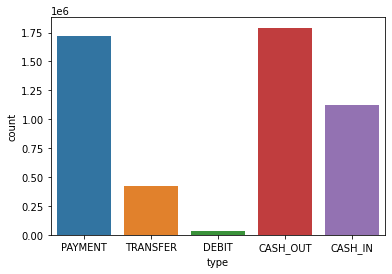

In [11]:
sns.countplot(df['type']);

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

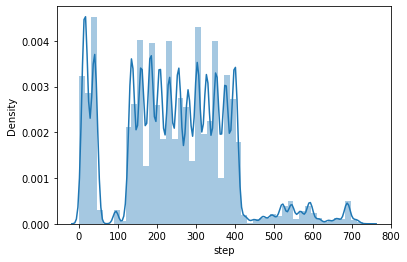

In [12]:
sns.distplot(df['step'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

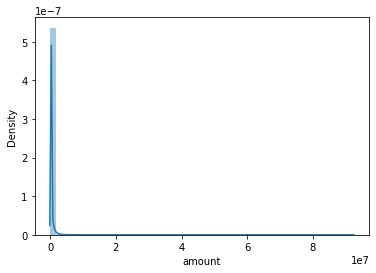

In [13]:
sns.distplot(df['amount'])

In [14]:
fraud = df[df['isFraud'] == 1]

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


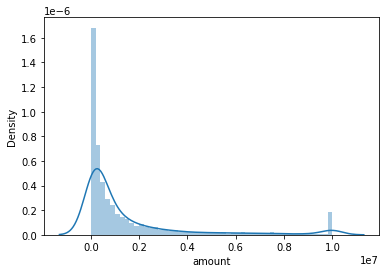

In [15]:
sns.distplot(fraud['amount']);

In [16]:
df['isFraud'].value_counts()

0.0    5083528
1.0       6568
Name: isFraud, dtype: int64

In [17]:
num = [i for i in df.columns if df[i].dtypes != 'O']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

3.	Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:<br>
a.	исследование шкалы измерения каждого существенного признака;<br>
b.	построение эмпирического распределения каждого существенного признака;<br>
c.	анализ количества и распределения отсутствующих значений;<br>
d.	построение совместного распределения каждого признака и целевой переменной;<br>
e.	построение корреляционной матрицы.<br>


#### Исследование шкалы измерения каждого существенного признака;

In [18]:
from typing import Tuple, Union

def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.dropna().unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()
    
    #Если категориальный признак-строка - нет смысла искать max/min
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values

res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
step,float64,743,1.0,743.0,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
type,object,5,-,-,"[CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER]"
amount,float64,4384722,0.0,92445516.64,"[0.0, 0.02, 0.03, 0.04, 0.06, 0.07, 0.09, 0.1,..."
nameOrig,object,5084166,-,-,"[C1000000639, C1000001337, C1000002591, C10000..."
oldbalanceOrg,float64,1514681,0.0,59585040.37,"[0.0, 0.05, 0.18, 0.21, 0.44, 0.67, 1.0, 1.02,..."
newbalanceOrig,float64,2156751,0.0,47316255.05,"[0.0, 0.01, 0.03, 0.12, 0.13, 0.18, 0.21, 0.23..."
nameDest,object,2266225,-,-,"[C1000004082, C1000004940, C1000013769, C10000..."
oldbalanceDest,float64,2897407,0.0,356015889.35,"[0.0, 0.01, 0.03, 0.13, 0.33, 0.37, 0.79, 1.0,..."
newbalanceDest,float64,2892055,0.0,356015889.35,"[0.0, 0.33, 1.64, 1.74, 2.15, 2.45, 2.71, 2.76..."
isFraud,float64,2,0.0,1.0,"[0.0, 1.0]"


#### Построение эмпирического распределения каждого существенного признака;

In [19]:
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

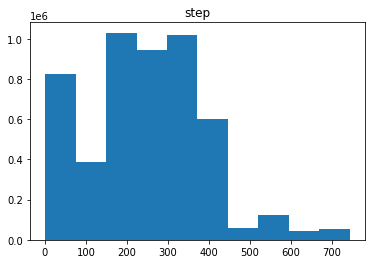

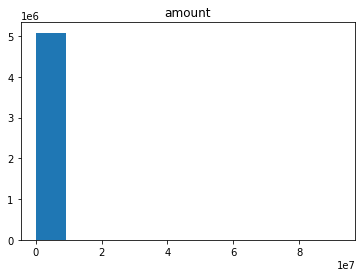

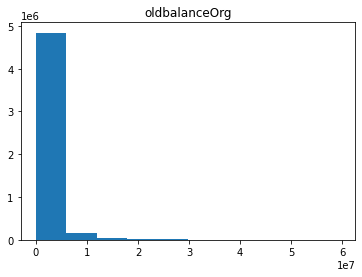

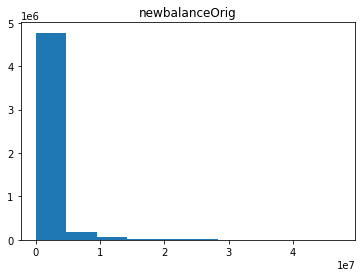

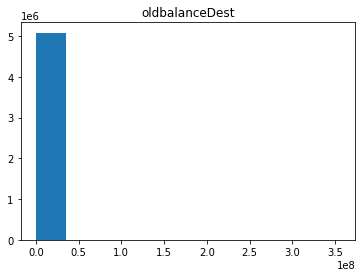

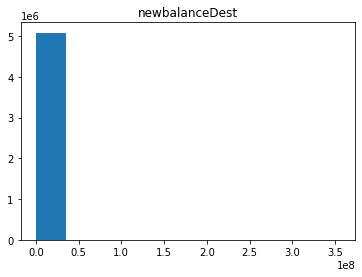

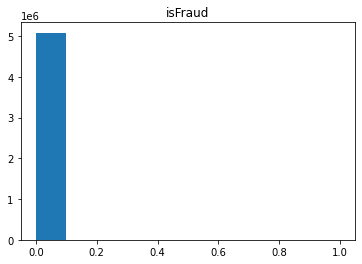

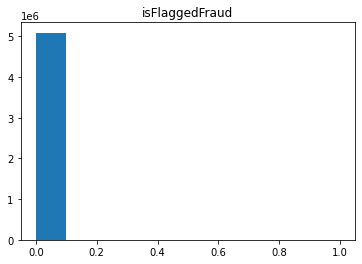

In [20]:
for column in num:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

step хоть как-то близок к нормальному распределнию, в остальном - ничего

#### Анализ количества и распределения отсутствующих значений

In [21]:
df.shape

(6362620, 11)

In [22]:
full_series = df.dropna().count()
full_series

step              546588
type              546588
amount            546588
nameOrig          546588
oldbalanceOrg     546588
newbalanceOrig    546588
nameDest          546588
oldbalanceDest    546588
newbalanceDest    546588
isFraud           546588
isFlaggedFraud    546588
dtype: int64

#### Построение совместного распределения каждого признака и целевой переменной

In [23]:
grouped_df = pd.DataFrame(df.groupby(['isFraud']).count())
grouped_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0.0,4066583,4067059,4066967,4067012,4066176,4067019,4067845,4067197,4067365,4066803
1.0,5316,5213,5277,5226,5257,5244,5273,5204,5193,5189


#### Построение корреляционной матрицы

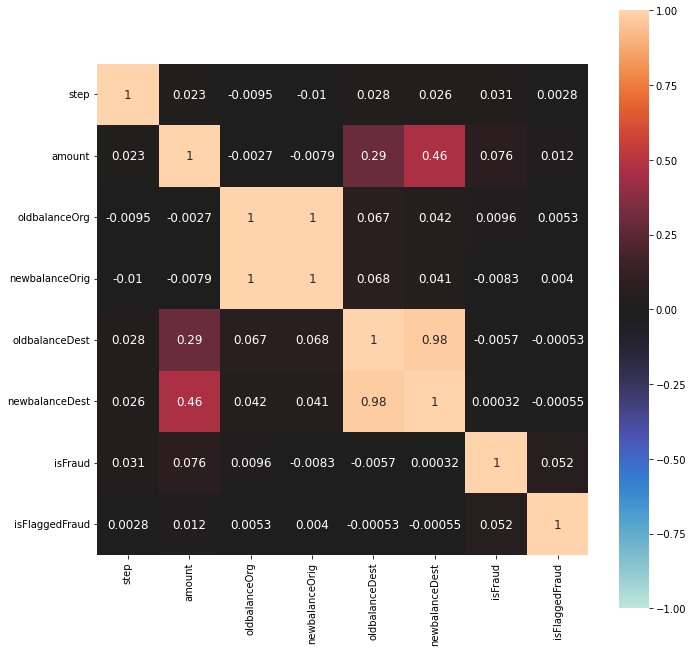

In [24]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Для целевой переменной isFraud особых корреляций от отдельного фактора не выявлено

#### 5.	Провести подготовительную обработку данных, включающую следующие шаги:<br>
a.	удаление или заполнение отсутствующих значений;<br>
b.	приведение всех признаков к бинарной либо числовой шкале;<br>
c.	удаление несущественных либо избыточных признаков;<br>
d.	другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).<br>

Заполнение отсутствующих значений

In [25]:
fixed_df = df.copy()
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,NaN,160296.36,M1979787155,0.00,0.00,0.0,NaN
1,1.0,PAYMENT,NaN,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,NaN,TRANSFER,181.00,C1305486145,181.00,0.00,NaN,NaN,NaN,1.0,0.0
3,1.0,NaN,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,NaN,0.0
4,1.0,PAYMENT,11668.14,NaN,41554.00,NaN,NaN,0.00,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6362615,NaN,CASH_OUT,339682.13,NaN,NaN,NaN,NaN,0.00,339682.13,1.0,0.0
6362616,743.0,TRANSFER,NaN,C1529008245,6311409.28,0.00,C1881841831,NaN,NaN,1.0,0.0
6362617,743.0,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,NaN,6379898.11,1.0,0.0
6362618,743.0,TRANSFER,NaN,C1685995037,NaN,0.00,C2080388513,NaN,0.00,1.0,0.0


**Общий алгоритм**
- Если фактор категориальный, то ставим значение моды по нему (в случае type)<br>
- Если фактор числовой и ассиметрия достаточно большая, то можно взять среднее<br>
- Если фактор числовой и ассиметрия не очень большая, то можно взять медиану<br>
- Так как выборка достаточно большая, есть возможность удалить некоторые отсутствующие данные

In [26]:
#Для step возьмем предыдущее значение
fixed_df["step"].fillna(method='ffill', inplace=True)

In [27]:
#Для type выозьмем моду
fixed_df["type"].fillna(fixed_df["type"].mode(), inplace=True)

In [28]:
#Для oldbalanceOrg newbalanceOrig, amount, oldbalanceDest, newbalanceDest данные восстанавливаем по связанным полям

In [29]:
def money_fix(series):
    
    if not np.isnan(series["oldbalanceOrg"]) and not np.isnan(series["newbalanceOrig"]) and np.isnan(series["amount"]):
        amount = abs(series["oldbalanceOrg"]-series["newbalanceOrig"])
        series["amount"] = amount    
    return series

fixed_df = fixed_df.apply(money_fix, axis=1)

In [30]:
# Все остальное удаляем т.к. выборка большая
fixed_df = fixed_df.dropna()

Все категориальные признаки меняем на числовые

In [31]:
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
7,1.0,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0.0,0.0
10,1.0,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0.0,0.0
16,1.0,PAYMENT,1563.82,C761750706,450.00,0.00,M1731217984,0.00,0.00,0.0,0.0
19,1.0,TRANSFER,705.00,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362575,740.0,CASH_OUT,1755647.81,C1724432558,1755647.81,0.00,C22170584,2930014.23,4685662.04,1.0,0.0
6362593,741.0,CASH_OUT,383661.10,C369315575,383661.10,0.00,C2069429837,1788112.70,2171773.80,1.0,0.0
6362610,742.0,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1.0,0.0
6362611,742.0,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1.0,0.0


In [32]:
fixed_df['nameOrig'] = fixed_df['nameOrig'].str[1:]
fixed_df['nameDest'] = fixed_df['nameDest'].str[1:]

In [33]:
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1.0,PAYMENT,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0.0,0.0
7,1.0,PAYMENT,7861.64,1912850431,176087.23,168225.59,633326333,0.00,0.00,0.0,0.0
10,1.0,DEBIT,9644.94,1900366749,4465.00,0.00,997608398,10845.00,157982.12,0.0,0.0
16,1.0,PAYMENT,1563.82,761750706,450.00,0.00,1731217984,0.00,0.00,0.0,0.0
19,1.0,TRANSFER,705.00,1670993182,705.00,0.00,1100439041,22425.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362575,740.0,CASH_OUT,1755647.81,1724432558,1755647.81,0.00,22170584,2930014.23,4685662.04,1.0,0.0
6362593,741.0,CASH_OUT,383661.10,369315575,383661.10,0.00,2069429837,1788112.70,2171773.80,1.0,0.0
6362610,742.0,TRANSFER,63416.99,778071008,63416.99,0.00,1812552860,0.00,0.00,1.0,0.0
6362611,742.0,CASH_OUT,63416.99,994950684,63416.99,0.00,1662241365,276433.18,339850.17,1.0,0.0


In [34]:
types = pd.get_dummies(fixed_df['type'], prefix='type', drop_first=True)
types

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1,0,0,1,0
7,0,0,1,0
10,0,1,0,0
16,0,0,1,0
19,0,0,0,1
...,...,...,...,...
6362575,1,0,0,0
6362593,1,0,0,0
6362610,0,0,0,1
6362611,1,0,0,0


In [35]:
fixed_df = pd.concat([types, fixed_df], axis=1)
fixed_df = fixed_df.drop('type', axis=1)
fixed_df

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,0,0,1,0,1.0,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0.0,0.0
7,0,0,1,0,1.0,7861.64,1912850431,176087.23,168225.59,633326333,0.00,0.00,0.0,0.0
10,0,1,0,0,1.0,9644.94,1900366749,4465.00,0.00,997608398,10845.00,157982.12,0.0,0.0
16,0,0,1,0,1.0,1563.82,761750706,450.00,0.00,1731217984,0.00,0.00,0.0,0.0
19,0,0,0,1,1.0,705.00,1670993182,705.00,0.00,1100439041,22425.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362575,1,0,0,0,740.0,1755647.81,1724432558,1755647.81,0.00,22170584,2930014.23,4685662.04,1.0,0.0
6362593,1,0,0,0,741.0,383661.10,369315575,383661.10,0.00,2069429837,1788112.70,2171773.80,1.0,0.0
6362610,0,0,0,1,742.0,63416.99,778071008,63416.99,0.00,1812552860,0.00,0.00,1.0,0.0
6362611,1,0,0,0,742.0,63416.99,994950684,63416.99,0.00,1662241365,276433.18,339850.17,1.0,0.0


In [36]:
#Формируем X и Y для дальнейшей передачи sklearn.model_selection.train_test_split
X = fixed_df.drop('isFraud', axis=1)
y = fixed_df['isFraud']

6.	Количественные характеристики датасета необходимо также привести после его обработки.

In [37]:
fixed_df.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,0,0,1,0,1.0,1864.28,1666544295,21249.00,19384.72,2044282225,0.0,0.00,0.0,0.0
7,0,0,1,0,1.0,7861.64,1912850431,176087.23,168225.59,633326333,0.0,0.00,0.0,0.0
10,0,1,0,0,1.0,9644.94,1900366749,4465.00,0.00,997608398,10845.0,157982.12,0.0,0.0
16,0,0,1,0,1.0,1563.82,761750706,450.00,0.00,1731217984,0.0,0.00,0.0,0.0
19,0,0,0,1,1.0,705.00,1670993182,705.00,0.00,1100439041,22425.0,0.00,0.0,0.0


In [38]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853723 entries, 1 to 6362619
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type_CASH_OUT   853723 non-null  uint8  
 1   type_DEBIT      853723 non-null  uint8  
 2   type_PAYMENT    853723 non-null  uint8  
 3   type_TRANSFER   853723 non-null  uint8  
 4   step            853723 non-null  float64
 5   amount          853723 non-null  float64
 6   nameOrig        853723 non-null  object 
 7   oldbalanceOrg   853723 non-null  float64
 8   newbalanceOrig  853723 non-null  float64
 9   nameDest        853723 non-null  object 
 10  oldbalanceDest  853723 non-null  float64
 11  newbalanceDest  853723 non-null  float64
 12  isFraud         853723 non-null  float64
 13  isFlaggedFraud  853723 non-null  float64
dtypes: float64(8), object(2), uint8(4)
memory usage: 74.9+ MB


In [39]:
fixed_df.shape

(853723, 14)

853723 строк, 14 факторов

In [40]:
fixed_df.describe()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,853723.000000,853723.000000,853723.000000,853723.000000,853723.000000,8.537230e+05,8.537230e+05,8.537230e+05,8.537230e+05,8.537230e+05,853723.000000,853723.000000
mean,0.351401,0.006458,0.338303,0.083863,243.585197,1.548198e+05,8.317770e+05,8.531238e+05,1.105016e+06,1.229942e+06,0.001233,0.000002
std,0.477408,0.080099,0.473132,0.277183,142.475686,5.500548e+05,2.882006e+06,2.918250e+06,3.460035e+06,3.735931e+06,0.035098,0.001531
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,156.000000,8.829080e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,239.000000,4.957256e+04,1.414100e+04,0.000000e+00,1.321774e+05,2.144976e+05,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,335.000000,1.844752e+05,1.070739e+05,1.440011e+05,9.421325e+05,1.111569e+06,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,743.000000,6.096528e+07,3.836475e+07,3.844183e+07,3.281945e+08,3.555534e+08,1.000000,1.000000
